Na par primera prikazaćemo rad Box-Cox transformacije podataka.

Pripremamo podatke.

**Uzorak koji koristimo:** Pruski konjanici koji su poginuli od udarca konja. Ovaj klasični skup podataka se dugo koristi kao primer nenormalne (Poasonove) raspodele podataka. U ovom skupu podataka, Bortkiewicz (1898) je prikupio broj konjanika u svakoj pruskoj vojnoj jedinici koji su svake godine poginuli od udarca konja između 1875. i 1894. godine.

In [1]:
# potrebne biblioteke
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import skew

from scipy.stats import boxcox

In [2]:
data_dict = {
    'Year': [1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894],
    'GC': [0, 2, 2, 1, 0, 0, 1, 1, 0, 3, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1],
    'C1': [0, 0, 0, 2, 0, 3, 0, 2, 1, 0, 0, 1, 1, 1, 0, 2, 0, 3, 0, 0],
    'C2': [0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0],
    'C3': [0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0],
    'C4': [0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0],
    'C5': [0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    'C6': [0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0],
    'C7': [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1, 3, 1, 1, 2, 0, 3, 0, 0],
    'C8': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0],
    'C9': [1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1],
    'C10': [0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0],
    'C11': [0, 0, 0, 0, 0, 4, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 3, 0, 1, 1],
    'C14': [1, 0, 2, 1, 1, 3, 0, 4, 3, 0, 1, 1, 1, 1, 2, 2, 0, 1, 3, 1],
    'C15': [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0]
}

data = pd.DataFrame(data_dict)

# Save to CSV
data.to_csv('data/prussian_horse_kick_data.csv', index=False)

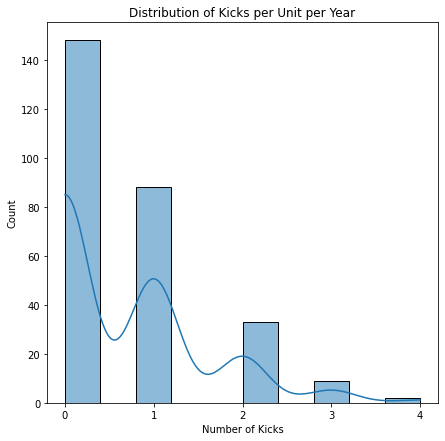

1.2554437113241088


In [25]:
melted_data = data.melt(id_vars=['Year'], var_name='Unit', value_name='Kicks')

# Plotovanje distribucije broja udaraca po jedinici godišnje
plt.figure(figsize = (7, 7))
sns.histplot(melted_data['Kicks'], bins=10, kde=True)
plt.title('Distribution of Kicks per Unit per Year')
plt.xlabel('Number of Kicks')

plt.xticks([0, 1, 2, 3, 4])
plt.show()

# Racunamo asimetriju
skew_val = skew(melted_data['Kicks'], axis=0, bias=True)
print(skew_val)

Kao sto očigledno možemo videti, uzorak **ne prati normalnu raspodelu**. 

Ima više vrednosti u levoj polovini grafika, tj. ima pozitivnu (desnu asimetriju), sto potvrđuje i izračunata vrednost skew > 0.

## Box-Cox transformacija

Box-Cox transformacija je stepenasta transformacija koja koristi parametar $λ$ da prilagodi raspodelu podataka. Različite vrednosti lambda omogućavaju različite transformacije.

S obzirom na to da λ može uzeti gotovo beskonačan broj vrednosti, teoretski možemo odrediti transformaciju da bude maksimalno efikasna u približavanju varijable normalnoj distribuciji, bez obzira na to da li je negativno ili pozitivno asimetrična. 

Takođe, kao što je gore pomenuto, ova porodica transformacija uključuje mnoge tradicionalne transformacije:

 - λ = 1.00: daje rezultate identične originalnim podacima
 - λ = 0.50: transformacija pomoću kvadratnog korena
 - λ = 0.33: transformacija pomoću kubnog korena
 - λ = 0.00: transformacija pomoću prirodnog logaritma
 - λ = -1.00: transformacija pomoću recipročne (inverzne) vrednosti

Navedene transformacije upoređujemo u [svesci](04_data_transformations.ipynb).

Funkcija boxcox iz biblioteke **scipy.stats** omogućava automatsko određivanje optimalne vrednosti λ koja **maksimizuje normalnost transformisanih podataka**. Kada pozovemo funkciju bez eksplicitnog zadavanja vrednosti λ, ona će pronaći najbolju moguću vrednost koja minimizuje asimetriju i približava distribuciju normalnoj.

Proveravamo da li u skupu podataka imamo negativne ili nula vrednosti i ako da transformišemo ih.

In [51]:
total = melted_data['Kicks']
count_zero = len(melted_data[total == 0])
count_negative = len(melted_data[total < 0])

count_zero, count_negative

(148, 0)

Originalna asimetrija: 1.2554437113241088


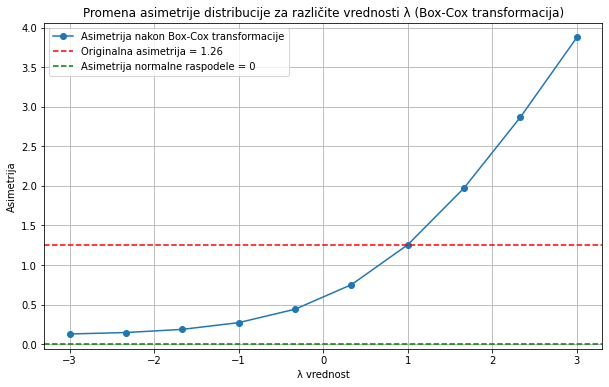

Optimalna vrednost λ prema boxcox funkciji: -1.0113407707941087


In [11]:
# zelimo da uporedimo asimetrije podataka za različite vrednosti λ

lambdas = np.linspace(-3, 3, 10)
skews = []

# dodajemo 1 zbog neophodnosti rada sa pozitivnim podacima
positive_data = melted_data['Kicks'] + 1

# Računamo asimetriju za svaku vrednost λ
for lam in lambdas:
    if lam == 0.00:
        transformed_data = np.log(positive_data) 
    else:
        transformed_data = boxcox(positive_data, lmbda=lam)
    skewness = skew(transformed_data)
    skews.append(skewness)

# Originalna asimetrija (Skewness)
original_skew = skew(positive_data)
print('Originalna asimetrija: {}'.format(original_skew))

# Prikaži rezultate na grafiku
plt.figure(figsize=(10, 6))
plt.plot(lambdas, skews, marker='o', label='Asimetrija nakon Box-Cox transformacije')
plt.axhline(y=original_skew, color='red', linestyle='--', label=f'Originalna asimetrija = {original_skew:.2f}')
plt.axhline(y=0, color='green', linestyle='--', label='Asimetrija normalne raspodele = 0')
plt.title('Promena asimetrije distribucije za različite vrednosti λ (Box-Cox transformacija)')
plt.xlabel('λ vrednost')
plt.ylabel('Asimetrija')
plt.legend()
plt.grid(True)
plt.show()

# Primeniti automatski odabranu optimalnu vrednost λ
optimal_transformed_data, optimal_lambda = boxcox(positive_data)
print(f'Optimalna vrednost λ prema boxcox funkciji: {optimal_lambda}')

**Log-verovatnoća** je koncept iz statistike koji se koristi u kontekstu procene parametara modela, uključujući i procenu optimalne vrednosti λ u Box-Cox transformaciji. Log-verovatnoća je logaritamska vrednost funkcije verovatnoće. 

Posmatramo kolika je verovatnoća da su podaci proizvedeni iz distribucije koja je transformisana Box-Cox transformacijom sa određenom vrednošću λ.

**Tražimo vrednost koja maksimizuje log-verovatnoću.**
Kada primenjujemo Box-Cox transformaciju, optimizacijski algoritmi isprobavaju različite vrednosti λ i izračunavaju log-verovatnoću za svaku od njih. Vrednost λ koja daje najveću log-verovatnoću smatra se optimalnom jer daje najbolje prilagođenu normalnu distribuciju podacima nakon transformacije.

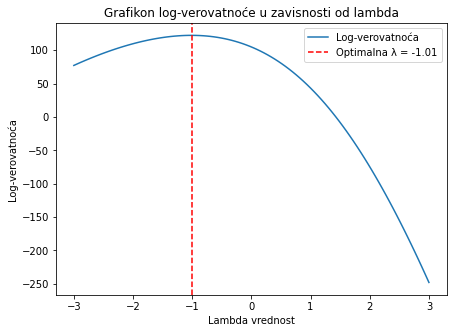

In [17]:
plt.figure(figsize = (7, 5))

# određivanje optimalna vrednost λ
lambdas = np.linspace(-3, 3, 100)
log_likelihoods = []

for l in lambdas:
    log_likelihood = stats.boxcox_llf(l, positive_data)  # Izračunaj log-verovatnoću
    log_likelihoods.append(log_likelihood)

# Plotovanje log-verovatnoće
plt.plot(lambdas, log_likelihoods, label='Log-verovatnoća')
plt.axvline(optimal_lambda, color='red', linestyle='--', label=f'Optimalna λ = {optimal_lambda:.2f}')
plt.xlabel('Lambda vrednost')
plt.ylabel('Log-verovatnoća')
plt.title('Grafikon log-verovatnoće u zavisnosti od lambda')
plt.legend()
plt.show()

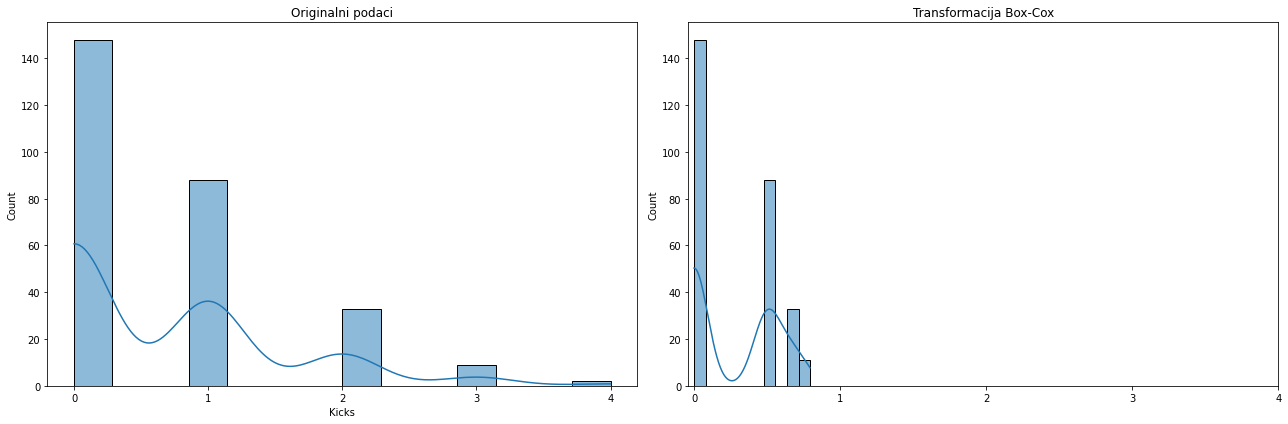

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(melted_data['Kicks'], ax=axes[0], kde=True)
axes[0].set_title('Originalni podaci')
axes[0].set_xticks([0, 1, 2, 3, 4])

sns.histplot(optimal_transformed_data, ax=axes[1], kde=True)
axes[1].set_title('Transformacija Box-Cox')
axes[1].set_xticks([0, 1, 2, 3, 4])

plt.tight_layout()
plt.show()

 Posmatramo Box-COx na drugom skupu podataka. 
 
 Uvozimo podatke

In [34]:
import os

# formiramo putanju do fajla
current_dir = os.getcwd()

file_name = 'data/air_time.csv'
file_path = os.path.join(current_dir, file_name)

try:
    data = pd.read_csv(file_path)
    print("File loaded successfully")
except FileNotFoundError as e:
    print(f"Error: {e}")

data.head()

print('Total data points:{}'.format(len(data['AIR_TIME'])))

File loaded successfully
Total data points:12657


Posmatraćemo kolonu koja broji ukupan broj poseta muzeju u jednom danu.
Ispitujemo da li imamo negativne ili nula vrednosti u skupu pdataka.

In [35]:
total_column = data['AIR_TIME']

len(data[total_column == 0]), len(data[total_column < 0])

(0, 0)

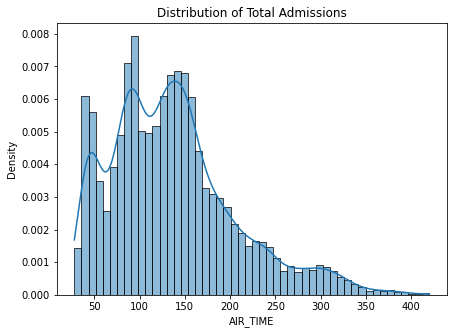

0.9008388414372591


In [46]:
plt.figure(figsize = (7, 5))

# pravimo histogram
sns.histplot(total_column, stat='density', bins=50, kde=True)
plt.title('Distribution of Total Admissions')

plt.show()

skew_val = skew(total_column, axis=0, bias=True)
print(skew_val)

Kao sto ocigledno mozemo videti, uzorak **ne prati normalnu raspodelu**. 

Ima vise vrednosti u levoj polovini grafika, tj ima pozitivnu (desnu asimetriju), sto potvrđuje i izračunata vrednost skew > 0.

Originalna asimetrija: 0.9008388414372591


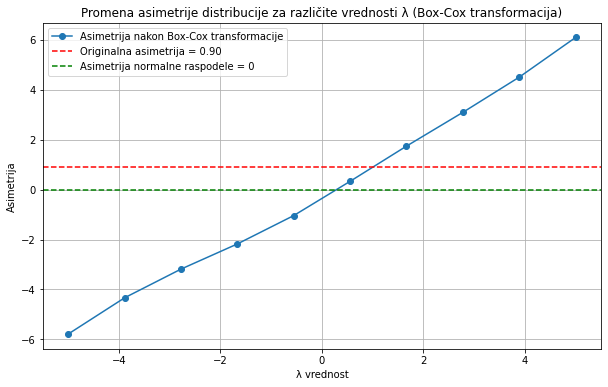

Optimalna vrednost λ prema boxcox funkciji: 0.2807713393426487


In [37]:
# racunamo asimetriju za razlicite vrednosti lambda
lambdas = np.linspace(-5, 5, 10)
skews = []

# Izračunaj asimetriju za svaku vrednost λ
for lam in lambdas:
    if lam == 0.00:
        transformed_data = np.log(total_column)
    else:
        transformed_data = boxcox(total_column, lmbda=lam)
    skewness = skew(transformed_data)
    skews.append(skewness)

# Originalna asimetrija (Skewness)
original_skew = skew(total_column)
print('Originalna asimetrija: {}'.format(original_skew))

# Prikaži rezultate na grafiku
plt.figure(figsize=(10, 6))
plt.plot(lambdas, skews, marker='o', label='Asimetrija nakon Box-Cox transformacije')
plt.axhline(y=original_skew, color='red', linestyle='--', label=f'Originalna asimetrija = {original_skew:.2f}')
plt.axhline(y=0, color='green', linestyle='--', label='Asimetrija normalne raspodele = 0')
plt.title('Promena asimetrije distribucije za različite vrednosti λ (Box-Cox transformacija)')
plt.xlabel('λ vrednost')
plt.ylabel('Asimetrija')
plt.legend()
plt.grid(True)
plt.show()

# Primeniti automatski odabranu optimalnu vrednost λ
optimal_transformed_data, optimal_lambda = boxcox(total_column)
print(f'Optimalna vrednost λ prema boxcox funkciji: {optimal_lambda}')

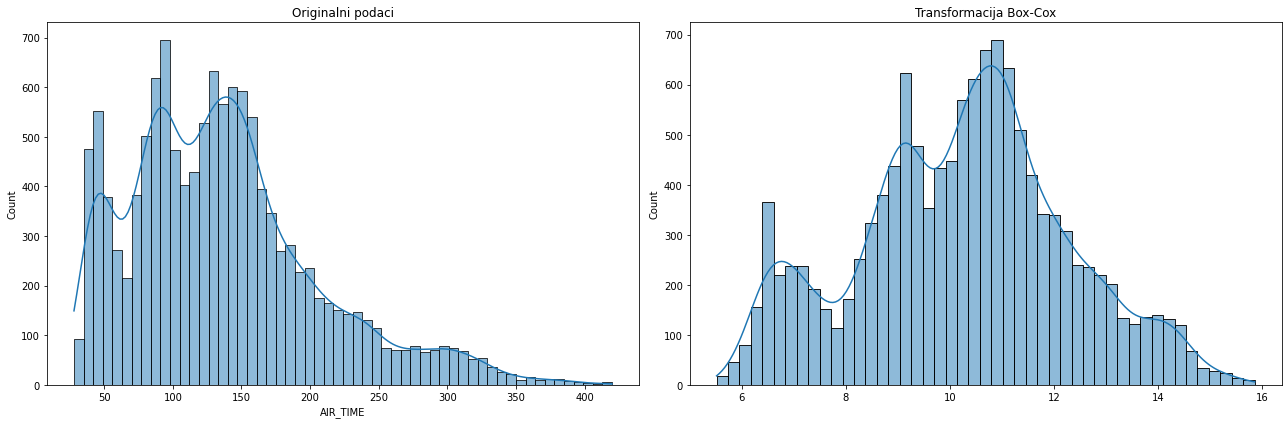

In [38]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.histplot(total_column, ax=axes[0], kde=True)
#sns.distplot(total_column, ax=axes[0], kde=True)
axes[0].set_title('Originalni podaci')

sns.histplot(optimal_transformed_data, ax=axes[1], kde=True)
#sns.distplot(optimal_transformed_data, ax=axes[1], kde=True)
axes[1].set_title('Transformacija Box-Cox')

plt.tight_layout()
plt.show()

Uvozimo drugi skup podataka.

**Uzorak koji koristimo:** Broj putnika po mesecima od 1949. do 1960. godine.

In [39]:
import os

# formiramo putanju do fajla
current_dir = os.getcwd()

file_name = 'data/air_passangers.csv'
file_path = os.path.join(current_dir, file_name)

try:
    data = pd.read_csv(file_path)
    print("File loaded successfully")
except FileNotFoundError as e:
    print(f"Error: {e}")

data.head()

print('Total data points:{}'.format(len(data['Date'])))

File loaded successfully
Total data points:144


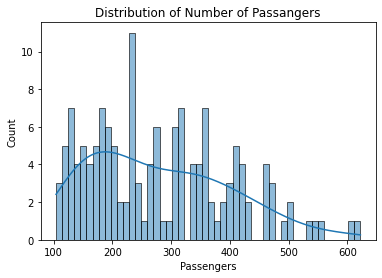

0.577068234901525


In [40]:
from scipy.stats import skew

passangers_column = data['Passengers']

# pravimo histogram
sns.histplot(passangers_column, bins=50, kde=True)
plt.title('Distribution of Number of Passangers')

plt.show()

skew_val = skew(passangers_column, axis=0, bias=True)
print(skew_val)

In [41]:
# Primeniti automatski odabranu optimalnu vrednost λ
optimal_transformed_data, optimal_lambda = boxcox(passangers_column)
print(f'Optimalna vrednost λ prema boxcox funkciji: {optimal_lambda}')

Optimalna vrednost λ prema boxcox funkciji: 0.14802265137037945


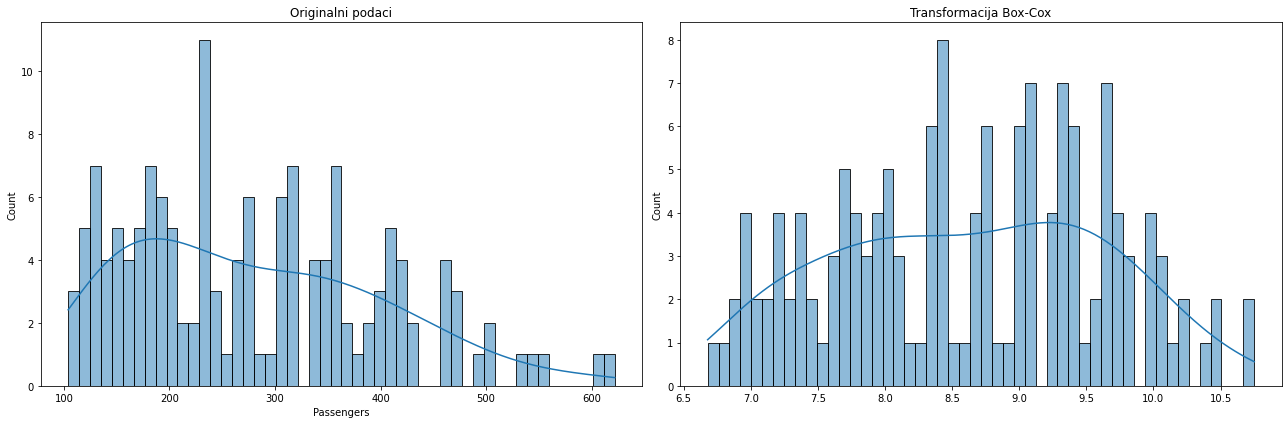

In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.histplot(passangers_column, ax=axes[0], bins = 50, kde=True)
#sns.distplot(passangers_column, ax=axes[0], kde=True)
axes[0].set_title('Originalni podaci')

sns.histplot(optimal_transformed_data, ax=axes[1], bins = 50, kde=True)
#sns.distplot(optimal_transformed_data, ax=axes[1], kde=True)
axes[1].set_title('Transformacija Box-Cox')

plt.tight_layout()
plt.show()